In [9]:
##Loading CIFAR10 dataset .as 60000 images devided into 10 common classes. 50k images for train and 10k for testing the performance of the network

#The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes,
# We can simply import the data from keras.dataset. First import cifar10 and then run the command cifar10.load_data()
import numpy as np
import keras
from keras.datasets import cifar10

ModuleNotFoundError: No module named 'numpy'

In [3]:
import matplotlib
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
import sys
print("sys version: {}".format(sys.version))
print('matplotlib version: {}'.format(matplotlib.__version__))
print(f"keras version : {keras.__version__}")

sys version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
matplotlib version: 3.1.3
keras version : 2.3.1


In [6]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [7]:
##now since we have the dataset, lets explore the data a little bit

print(f"train data shape :{X_train.shape}")
print(f"test data shape: {X_test.shape}")
print(X_train[0].shape)

train data shape :(50000, 32, 32, 3)
test data shape: (10000, 32, 32, 3)
(32, 32, 3)


In [5]:
#lets plot some images. pretty small images. it is dais that human accuracy is about 90 in this dataset. So, if we can achieve an accuraacy higher than that, we will do a pretty good job

f=plt.figure(figsize=(5,5))
for i in range(0,9):
    f.add_subplot(330+1+i)
    img=X_test[i]
    plt.imshow(img)

NameError: name 'plt' is not defined

In [8]:
#Lets normalize the data by dividing by 255
seed=6
np.random.seed(seed)
X_train=X_train/255.0
X_test=X_test/255.0
# X_train=X_train.astype("float32")
print(X_train[0])


[[[0.00090734 0.00095348 0.00096886]
  [0.00066128 0.00070742 0.00069204]
  [0.00076894 0.00073818 0.00066128]
  ...
  [0.00242983 0.00202999 0.0016609 ]
  [0.00233756 0.00192234 0.00156863]
  [0.00227605 0.00190696 0.00158401]]

 [[0.00024606 0.00030757 0.00030757]
  [0.         0.         0.        ]
  [0.00027682 0.00012303 0.        ]
  ...
  [0.00189158 0.00135333 0.00084583]
  [0.00183007 0.00127643 0.00076894]
  [0.0018762  0.00133795 0.00087659]]

 [[0.00038447 0.00036909 0.00032295]
  [0.00024606 0.00010765 0.        ]
  [0.00075356 0.00041522 0.00012303]
  ...
  [0.00181469 0.00129181 0.00076894]
  [0.00184544 0.00129181 0.00076894]
  [0.00167628 0.00112265 0.00064591]]

 ...

 [[0.00319877 0.00261438 0.00147636]
  [0.00309112 0.00235294 0.00052288]
  [0.00304498 0.00247597 0.00039985]
  ...
  [0.00246059 0.00204537 0.00107651]
  [0.00086121 0.00047674 0.00010765]
  [0.00081507 0.00052288 0.00030757]]

 [[0.00276817 0.00213764 0.00147636]
  [0.00266052 0.00189158 0.00064591]


In [9]:
# we will have to do some pre-processing with the label data as its a nulticlass classification(10 class) problem so we are expecting a label shaoe of 10,1
# we can do that by deploying one hot encoding
print("original shape of label data:")
print(y_train.shape)
print(y_test.shape)
print("shape of label dataset after one hot encoding:")
y_test_cat=np_utils.to_categorical(y_test)
y_train_cat=np_utils.to_categorical(y_train)
print(y_test_cat.shape)
print(y_train_cat.shape)
print(f"no of classes: {y_train.shape[1]}")

original shape of label data:
(50000, 1)
(10000, 1)
shape of label dataset after one hot encoding:
(10000, 10)
(50000, 10)
no of classes: 1


[6]
the image is that of a : frog


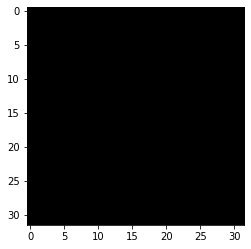

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truc']
plt.imshow(X_train[0])
print(y_train[0])
print(f'the image is that of a : {classes[int(y_train[0])]}')

##
 we will be using the All-CNN network published in the 2015 ICLR paper, "Striving For Simplicity: The All Convolutional Net". This paper can be found at the following link:

https://arxiv.org/pdf/1412.6806.pdf

The best model as descibed in the paper

* 3×3conv.96ReLU
* 3×3conv.96ReLU
* 3*3 maxpooling stride 2
*3×3conv.192ReLU
*3×3conv.192ReLU
*3×3max-pooling stride2
*3×3conv.192ReLU
*1×1conv.192ReLU
*1×1conv.10ReLU
* global averaging over6×6spatial dimensions

* 10 or 100-way softmax

##


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Activation,GlobalAveragePooling2D
from keras.optimizers import SGD

In [13]:
def allcnn(weights=None):

    model=Sequential()

    model.add(Conv2D(96,(3, 3), padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same', ))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same',strides = (2,2) ))
    model.add(Dropout(0.5))
    model.add(Conv2D(192,(3,3), padding = 'same', ))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding = 'same', ))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding = 'same',strides = (2,2) ))
    model.add(Dropout(0.5))
    model.add(Conv2D(192,(3,3), padding = 'same', ))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    #addding  global averAGE pooling with softmax

    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    #We will use weights from a pre trained model
    if weights:
        model.load_weights(weights)
    return model

In [14]:
#hyperparameters
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

model=allcnn()

#compiling the model
sgd=SGD(lr=learning_rate, decay = weight_decay, momentum = momentum ,    nesterov = True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics  = ['accuracy'] )

# print the model architecture
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)      

In [42]:
# Now other parameters
epochs=350
batch_size=32
#Lets fit the model
# (X_train,y_train),(X_test,y_test)
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/350
22912/50000 [============>.................] - ETA: 27:43 - loss: 2.0926 - accuracy: 0.2066

KeyboardInterrupt: 

In [ ]:
# Since this is a very large model and it will take 100 hours or more to train on our CPU, The best way is to train the model on GPU, which will drastically cut down the training time.
# The best we can do is to use a pre-trained model
# Search on google for pre-trained model or weights for CIFAR10, ALl-CNN-3 model and use them for our model to make predictions
# we will be using the weights from the git hub repository: https://github.com/PAN001/All-CNN
# the file with all the weights is: https://github.com/PAN001/All-CNN/blob/master/all_cnn_weights_0.9088_0.4994.hdf5


In [43]:
import os

In [44]:
#Checking the working directory. the weights file downloaded from github has been stored there
print(os.getcwd())

C:\WINDOWS\system32


In [15]:
#hyperparameters
# learning_rate=0.01
# weight_decay=1e-6
# momentum=0.9
# Now since we have the weights with us, we do not need the training parameters. Instead of fitting the model we will test the model.
weights='all_cnn_weights_0.9088_0.4994.hdf5'

model=allcnn(weights)

#compiling the model
sgd=SGD(lr=learning_rate, decay = weight_decay, momentum = momentum ,    nesterov = True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics  = ['accuracy'] )

# print the model architecture
print(model.summary())

# NOW lets test the model and evaluate it on our test data

scores=model.evaluate(X_test,y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)      

In [51]:
type(scores)
print(scores[1])
scores?

0.10010000318288803


Type:        list
String form: [4.725852056884766, 0.10010000318288803]
Length:      2
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [52]:
classes=range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truc']

class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truc'}


In [67]:
batch=X_test[9900:9905]
labels=y_test[501:512]

print(labels,end=" ")
print("the image is that of a : {}".format(class_labels[int(y_test[1])]))

[[6]
 [5]
 [4]
 [9]
 [4]
 [7]
 [9]
 [9]
 [4]
 [5]
 [6]] the image is that of a : ship


In [68]:
predictions=model.predict(batch)
print(predictions)
# this will actually give out the softmax output, which is the probabilities for each class
class_results=np.argmax(predictions,axis=-1)
print(class_results)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[8 0 1 6 0]


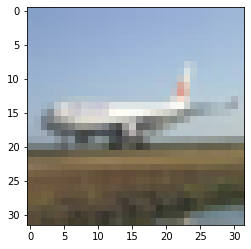

In [76]:

plt.imshow(X_test[9904])

In [70]:
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truc'}
